In [1]:
import os
import time
import math
import re
import struct
import traceback

import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'ETL7INFO',
 'ETL7LC_1',
 'ETL7LC_2',
 'ETL7SC_1',
 'ETL7SC_2',
 'etl_7_inspect_data.ipynb']

In [3]:
file_list = [
    'ETL7LC_1',
    'ETL7LC_2',
    'ETL7SC_1',
    'ETL7SC_2',
]

In [4]:
filename = file_list[0]
filename

'ETL7LC_1'

In [5]:
RECORD_LENGTH = 2052 # bytes

In [6]:
with open(filename, 'rb') as data_file:
    record_string = data_file.read(RECORD_LENGTH)

In [7]:
print(type(record_string), len(record_string))

<class 'bytes'> 2052


In [8]:
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'

In [9]:
record = struct.unpack(UNPACK_STRING, record_string)
print(type(record), len(record))

<class 'tuple'> 19


In [10]:
record_dict = {
    'index': record[0], # type: int
    'character_name': record[1], # type: bytes - ascii encoding (e.g. A, KA, 0, $)
    'sheet_index': record[2], # type: int
    'JIS_X_0201_CODE': record[3], # type: binary - https://en.wikipedia.org/wiki/JIS_X_0201
    'EBCDIC_CODE': record[4], # type: binary - https://en.wikipedia.org/wiki/EBCDIC
    'image_quality': record[5], # type: int - [0, 1, 2, 3] with 0 is clean
    'group_quality': record[6], # type: int - [0, 1, 2] with 0 is clean
    'writer_gender': record[7], # type: int - 1 is male, 2 is female. JIS X 0303 encoding?
    'writer_age': record[8], # type: int - 
    'serial_data_index': record[9], # type: int
    'industry_classification_code': record[10], # type: int - JIS X 0403
    'occupation_classification_code': record[11], # type: int - JIS X 0404
    'data_of_sheet_gathering': record[12], # type: int - data of sheet gathering (19)YYMM
    'date_of_scan': record[13], # type: int - date of scan (19)YYMM
    'x_pos': record[14], # type: int - x coordinate of scan position on sheet (>= 1)
    'y_pos': record[15], # type: int - y coordinate of scan position on sheet (>= 1)
    'minimum_intensity_level': record[16], # type: int - value in range (0-255)
    'maximum_scanned_level': record[17], # type: int - value in range (0-255)
    'image_data': record[18], # type: bytes
}

In [11]:
for key in record_dict.keys():
    print(key, type(record_dict[key]))

index <class 'int'>
character_name <class 'bytes'>
sheet_index <class 'int'>
JIS_X_0201_CODE <class 'int'>
EBCDIC_CODE <class 'int'>
image_quality <class 'int'>
group_quality <class 'int'>
writer_gender <class 'int'>
writer_age <class 'int'>
serial_data_index <class 'int'>
industry_classification_code <class 'int'>
occupation_classification_code <class 'int'>
data_of_sheet_gathering <class 'int'>
date_of_scan <class 'int'>
x_pos <class 'int'>
y_pos <class 'int'>
minimum_intensity_level <class 'int'>
maximum_scanned_level <class 'int'>
image_data <class 'bytes'>


In [12]:
record_dict['character_name']

b' A'

In [13]:
record_dict['character_name'].decode('ascii').strip()

'A'

In [14]:
width = 64
height = 63
img = np.array(Image.frombytes('F', (width, height), record_dict['image_data'], 'bit', 4))

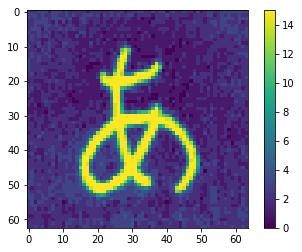

In [15]:
plt.imshow(img)
plt.colorbar()

In [16]:
total_samples = 0
record_count = {}
RECORD_LENGTH = 2052 # bytes
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'

for filename in file_list:
    f = open(filename, 'rb')

    while True:
        record_string = f.read(RECORD_LENGTH)

        if len(record_string) < RECORD_LENGTH:
            break
        total_samples += 1
        record = struct.unpack(UNPACK_STRING, record_string)

        record_dict = {
            'index': record[0], # type: int
            'character_name': record[1], # type: bytes - ascii encoding (e.g. A, KA, 0, $)
            'sheet_index': record[2], # type: int
            'JIS_X_0201_CODE': record[3], # type: binary - https://en.wikipedia.org/wiki/JIS_X_0201
            'EBCDIC_CODE': record[4], # type: binary - https://en.wikipedia.org/wiki/EBCDIC
            'image_quality': record[5], # type: int - [0, 1, 2, 3] with 0 is clean
            'group_quality': record[6], # type: int - [0, 1, 2] with 0 is clean
            'writer_gender': record[7], # type: int - 1 is male, 2 is female. JIS X 0303 encoding?
            'writer_age': record[8], # type: int - 
            'serial_data_index': record[9], # type: int
            'industry_classification_code': record[10], # type: int - JIS X 0403
            'occupation_classification_code': record[11], # type: int - JIS X 0404
            'data_of_sheet_gathering': record[12], # type: int - data of sheet gathering (19)YYMM
            'date_of_scan': record[13], # type: int - date of scan (19)YYMM
            'x_pos': record[14], # type: int - x coordinate of scan position on sheet (>= 1)
            'y_pos': record[15], # type: int - y coordinate of scan position on sheet (>= 1)
            'minimum_intensity_level': record[16], # type: int - value in range (0-255)
            'maximum_scanned_level': record[17], # type: int - value in range (0-255)
            'image_data': record[18], # type: bytes
        }

        name = record_dict['character_name'].decode('ascii').strip()

        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

    f.close()

In [17]:
total_samples

33600

In [18]:
len(record_count.keys())

48

In [19]:
record_count

{'A': 700,
 'I': 700,
 'U': 700,
 'E': 700,
 'O': 700,
 'KA': 700,
 'KI': 700,
 'KU': 700,
 'KE': 700,
 'KO': 700,
 'SA': 700,
 'SI': 700,
 'SU': 700,
 'SE': 700,
 'SO': 700,
 'TA': 700,
 'TI': 700,
 'TU': 700,
 'TE': 700,
 'TO': 700,
 'NA': 700,
 'NI': 700,
 'NU': 700,
 'NE': 700,
 'NO': 700,
 'HA': 700,
 'HI': 700,
 'HU': 700,
 'HE': 700,
 'HO': 700,
 'MA': 700,
 'MI': 700,
 'MU': 700,
 'ME': 700,
 'MO': 700,
 'YA': 700,
 'YU': 700,
 'YO': 700,
 'RA': 700,
 'RI': 700,
 'RU': 700,
 'RE': 700,
 'RO': 700,
 'WA': 700,
 'WO': 700,
 'N': 700,
 ',,': 700,
 ',0': 700}